In [65]:
import pandas as pd 
import numpy as np
from datetime import datetime 

import seaborn as sns
from matplotlib import pyplot as plt 
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode

from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [66]:
#reading the dataset
df_receivable = pd.read_csv("https://raw.githubusercontent.com/Pradyumn10/Data-Science-Python/master/Machine%20Learning/AR_Data/WA_Fn-UseC_-Accounts-Receivable.csv") 

In [67]:
#seeing the data
df_receivable

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,8/2/2012,9982796720,10/18/2013,11/17/2013,79.61,No,12/1/2013,Electronic,44,14
2462,391,9841-XLGBV,1/3/2013,9983237240,9/19/2012,10/19/2012,38.25,No,10/13/2012,Paper,24,0
2463,770,7856-ODQFO,8/5/2012,9986249860,7/2/2012,8/1/2012,67.59,No,7/27/2012,Paper,25,0
2464,770,7050-KQLDO,9/29/2012,9989225541,4/27/2012,5/27/2012,53.16,No,5/18/2012,Paper,21,0


In [68]:
#checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [69]:
#converting invoice date, due date, paperless date datatype to datetime
df_receivable['InvoiceDate']= pd.to_datetime(df_receivable.InvoiceDate)
df_receivable['DueDate'] = pd.to_datetime(df_receivable['DueDate'])
df_receivable['PaperlessDate'] = pd.to_datetime(df_receivable['PaperlessDate'])

In [70]:
df_receivable

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,11/28/2012,Paper,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,2012-08-02,9982796720,2013-10-18,2013-11-17,79.61,No,12/1/2013,Electronic,44,14
2462,391,9841-XLGBV,2013-01-03,9983237240,2012-09-19,2012-10-19,38.25,No,10/13/2012,Paper,24,0
2463,770,7856-ODQFO,2012-08-05,9986249860,2012-07-02,2012-08-01,67.59,No,7/27/2012,Paper,25,0
2464,770,7050-KQLDO,2012-09-29,9989225541,2012-04-27,2012-05-27,53.16,No,5/18/2012,Paper,21,0


In [71]:
df_receivable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   datetime64[ns]
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   datetime64[ns]
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   object        
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 231.3+ KB


In [72]:
#Due Date is standard 30 days.
Vade = df_receivable['DueDate'] - df_receivable['InvoiceDate']
print(Vade.value_counts())

30 days    2466
dtype: int64


In [73]:
df_receivable

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,11/28/2012,Paper,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,2012-08-02,9982796720,2013-10-18,2013-11-17,79.61,No,12/1/2013,Electronic,44,14
2462,391,9841-XLGBV,2013-01-03,9983237240,2012-09-19,2012-10-19,38.25,No,10/13/2012,Paper,24,0
2463,770,7856-ODQFO,2012-08-05,9986249860,2012-07-02,2012-08-01,67.59,No,7/27/2012,Paper,25,0
2464,770,7050-KQLDO,2012-09-29,9989225541,2012-04-27,2012-05-27,53.16,No,5/18/2012,Paper,21,0


In [74]:
#Separation and Normalization
df_receivable['PaperlessDateMonth'] = df_receivable['PaperlessDate'].dt.month/12
df_receivable['PaperlessDateDay'] = df_receivable['PaperlessDate'].dt.day/31
df_receivable['InvoiceDateMonth'] = df_receivable['InvoiceDate'].dt.month/12
df_receivable['InvoiceDateDay'] = df_receivable['InvoiceDate'].dt.day/31

In [75]:
df_receivable

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaperlessDateMonth,PaperlessDateDay,InvoiceDateMonth,InvoiceDateDay
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,1/15/2013,Paper,13,0,0.333333,0.193548,0.083333,0.064516
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,3/3/2013,Electronic,36,6,0.250000,0.096774,0.083333,0.838710
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,7/8/2013,Electronic,5,0,0.083333,0.838710,0.583333,0.096774
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,3/17/2013,Electronic,35,5,0.333333,0.193548,0.166667,0.322581
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,11/28/2012,Paper,34,4,0.916667,0.838710,0.833333,0.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,2012-08-02,9982796720,2013-10-18,2013-11-17,79.61,No,12/1/2013,Electronic,44,14,0.666667,0.064516,0.833333,0.580645
2462,391,9841-XLGBV,2013-01-03,9983237240,2012-09-19,2012-10-19,38.25,No,10/13/2012,Paper,24,0,0.083333,0.096774,0.750000,0.612903
2463,770,7856-ODQFO,2012-08-05,9986249860,2012-07-02,2012-08-01,67.59,No,7/27/2012,Paper,25,0,0.666667,0.161290,0.583333,0.064516
2464,770,7050-KQLDO,2012-09-29,9989225541,2012-04-27,2012-05-27,53.16,No,5/18/2012,Paper,21,0,0.750000,0.935484,0.333333,0.870968


In [76]:
def numeric_to_categoric (x):
    if x <= 25: return "Less and Equal 25"
    elif x <= 50: return "Between (25-50]"
    elif x <= 75: return "Between (50-75]"
    elif x <= 100: return "Between (75-100]"
    else: return "Greater 100"
df_receivable['InvoiceAmount'] = df_receivable['InvoiceAmount'].apply(numeric_to_categoric)

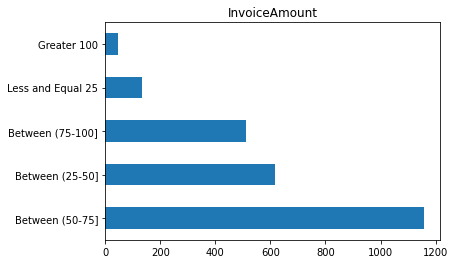

In [77]:
df_receivable['InvoiceAmount'].value_counts().plot(kind='barh', title='InvoiceAmount')

In [78]:
data_1 = df_receivable[df_receivable['DaysLate'] != 0]

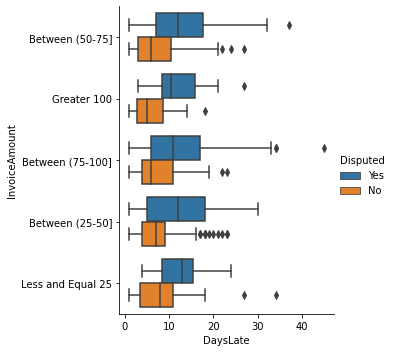

In [79]:
sns.catplot(x="DaysLate", y="InvoiceAmount",hue="Disputed",
            kind="box", dodge=True, data=data_1)

In [80]:
def numeric_to_categoric(x):
    if x == 0: return "0 days"
    elif x <= 2: return "(0-2] days"
    elif x <= 4: return "(2-4] days"
    elif x <= 6: return "(4-6] days"
    elif x <= 8: return "(6-8] days"
    elif x <= 10: return "(8-10] days"
    else: return "(10-) days"
df_receivable['DaysLate'] = df_receivable['DaysLate'].apply(numeric_to_categoric)

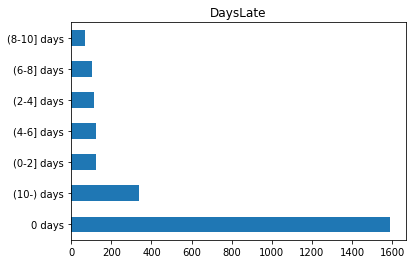

In [81]:
df_receivable['DaysLate'].value_counts().plot(kind='barh', title='DaysLate')

In [82]:
df_receivable

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaperlessDateMonth,PaperlessDateDay,InvoiceDateMonth,InvoiceDateDay
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,Between (50-75],No,1/15/2013,Paper,13,0 days,0.333333,0.193548,0.083333,0.064516
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,Between (50-75],Yes,3/3/2013,Electronic,36,(4-6] days,0.250000,0.096774,0.083333,0.838710
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,Between (50-75],No,7/8/2013,Electronic,5,0 days,0.083333,0.838710,0.583333,0.096774
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,Greater 100,No,3/17/2013,Electronic,35,(4-6] days,0.333333,0.193548,0.166667,0.322581
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,Between (50-75],Yes,11/28/2012,Paper,34,(2-4] days,0.916667,0.838710,0.833333,0.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,2012-08-02,9982796720,2013-10-18,2013-11-17,Between (75-100],No,12/1/2013,Electronic,44,(10-) days,0.666667,0.064516,0.833333,0.580645
2462,391,9841-XLGBV,2013-01-03,9983237240,2012-09-19,2012-10-19,Between (25-50],No,10/13/2012,Paper,24,0 days,0.083333,0.096774,0.750000,0.612903
2463,770,7856-ODQFO,2012-08-05,9986249860,2012-07-02,2012-08-01,Between (50-75],No,7/27/2012,Paper,25,0 days,0.666667,0.161290,0.583333,0.064516
2464,770,7050-KQLDO,2012-09-29,9989225541,2012-04-27,2012-05-27,Between (50-75],No,5/18/2012,Paper,21,0 days,0.750000,0.935484,0.333333,0.870968


In [83]:
#Binary Encoding
ce_binary = ce.BinaryEncoder(cols=['countryCode'])
binary_data = ce_binary.fit_transform(df_receivable)

In [84]:
binary_data

,countryCode_0,countryCode_1,countryCode_2,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaperlessDateMonth,PaperlessDateDay,InvoiceDateMonth,InvoiceDateDay
0,0,0,1,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,Between (50-75],No,1/15/2013,Paper,13,0 days,0.333333,0.193548,0.083333,0.064516
1,0,1,0,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,Between (50-75],Yes,3/3/2013,Electronic,36,(4-6] days,0.250000,0.096774,0.083333,0.838710
2,0,0,1,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,Between (50-75],No,7/8/2013,Electronic,5,0 days,0.083333,0.838710,0.583333,0.096774
3,0,1,0,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,Greater 100,No,3/17/2013,Electronic,35,(4-6] days,0.333333,0.193548,0.166667,0.322581
4,0,1,1,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,Between (50-75],Yes,11/28/2012,Paper,34,(2-4] days,0.916667,0.838710,0.833333,0.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0,0,1,6708-DPYTF,2012-08-02,9982796720,2013-10-18,2013-11-17,Between (75-100],No,12/1/2013,Electronic,44,(10-) days,0.666667,0.064516,0.833333,0.580645
2462,0,0,1,9841-XLGBV,2013-01-03,9983237240,2012-09-19,2012-10-19,Between (25-50],No,10/13/2012,Paper,24,0 days,0.083333,0.096774,0.750000,0.612903
2463,1,0,1,7856-ODQFO,2012-08-05,9986249860,2012-07-02,2012-08-01,Between (50-75],No,7/27/2012,Paper,25,0 days,0.666667,0.161290,0.583333,0.064516
2464,1,0,1,7050-KQLDO,2012-09-29,9989225541,2012-04-27,2012-05-27,Between (50-75],No,5/18/2012,Paper,21,0 days,0.750000,0.935484,0.333333,0.870968


In [85]:
#OneHotEncoder
dummy_data = pd.get_dummies(binary_data, columns = ['Disputed', 'PaperlessBill','InvoiceAmount'],drop_first=True)

In [86]:
#Can be deleted
dummy_data['countryCode_0'].value_counts()

0    1564
1     902
Name: countryCode_0, dtype: int64

In [87]:
#Drop Columns
data = dummy_data.drop(columns=['SettledDate', 'DueDate','InvoiceDate','DaysToSettle','invoiceNumber','PaperlessDate','countryCode_0','customerID'])

In [88]:
#Train Test Split
y = pd.DataFrame(data['DaysLate'])
data.drop(['DaysLate'], inplace=True, axis=1)
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.33, random_state=42)

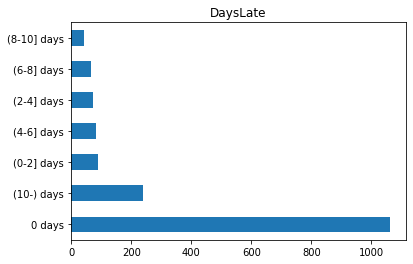

In [89]:
y_train['DaysLate'].value_counts().plot(kind='barh', title='DaysLate')

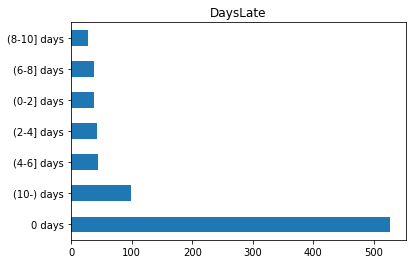

In [90]:
y_test['DaysLate'].value_counts().plot(kind='barh', title='DaysLate')

In [91]:
#Logistic Regression Model
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=0)

In [92]:
y_pred = logr.predict(X_test)

In [93]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.6695331695331695


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



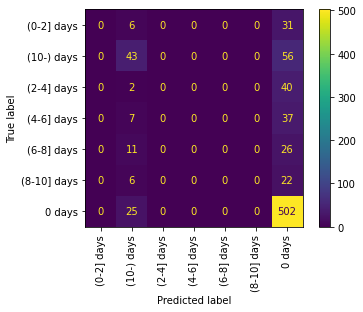

In [94]:
plot_confusion_matrix(logr, X_test, y_test,xticks_rotation='vertical')  
plt.show()